In [13]:
import os
import shutil
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import shutil
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from keras.optimizers import Adam
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array

import random
from IPython.display import Image, display


In [2]:
import numpy as np
from sklearn.model_selection import train_test_split

# Set the path to the dataset
dataset_dir = 'Fruit And Vegetable Diseases Dataset'
classes = os.listdir(dataset_dir)

# Create directories for train, val, and test sets
output_dir = 'output_dataset'
os.makedirs(output_dir, exist_ok=True)
os.makedirs(os.path.join(output_dir, 'train'), exist_ok=True)
os.makedirs(os.path.join(output_dir, 'val'), exist_ok=True)
os.makedirs(os.path.join(output_dir, 'test'), exist_ok=True)

for cls in classes:
    os.makedirs(os.path.join(output_dir, 'train', cls), exist_ok=True)
    os.makedirs(os.path.join(output_dir, 'val', cls), exist_ok=True)
    os.makedirs(os.path.join(output_dir, 'test', cls), exist_ok=True)

    class_dir = os.path.join(dataset_dir, cls)
    images = os.listdir(class_dir)[:200]

    print(cls,len(images))

    train_and_val_images, test_images = train_test_split(images, test_size=0.2, random_state=42)
    train_images, val_images = train_test_split(train_and_val_images, test_size=0.25, random_state=42) # 0.25 x 0.8 = 0.2

    # Copy images to respective directories
    for img in train_images:
        shutil.copy(os.path.join(class_dir, img), os.path.join(output_dir, 'train', cls, img))
    for img in val_images:
        shutil.copy(os.path.join(class_dir, img), os.path.join(output_dir, 'val', cls, img))
    for img in test_images:
        shutil.copy(os.path.join(class_dir, img), os.path.join(output_dir, 'test', cls, img))

print("Dataset split into training, validation, and test sets.")

Apple__Healthy 200
Apple__Rotten 200
Banana__Healthy 200
Banana__Rotten 200
Bellpepper__Healthy 200
Bellpepper__Rotten 200
Carrot__Healthy 200
Carrot__Rotten 200
Cucumber__Healthy 200
Cucumber__Rotten 200
Grape__Healthy 200
Grape__Rotten 200
Guava__Healthy 200
Guava__Rotten 200
Jujube__Healthy 200
Jujube__Rotten 200
Mango__Healthy 200
Mango__Rotten 200
Orange__Healthy 200
Orange__Rotten 200
Pomegranate__Healthy 200
Pomegranate__Rotten 200
Potato__Healthy 200
Potato__Rotten 200
Strawberry__Healthy 200
Strawberry__Rotten 200
Tomato__Healthy 200
Tomato__Rotten 200
Dataset split into training, validation, and test sets.


In [4]:
# Define directories
dataset_dir = 'output_dataset'
train_dir = os.path.join(dataset_dir, 'train')
val_dir = os.path.join(dataset_dir, 'val')
test_dir = os.path.join(dataset_dir, 'test')

# Define image size expected by the pre-trained model
IMG_SIZE = (224, 224) # Common size for many models like ResNet, VGG, MobileNet

# Create ImageDataGenerators for resizing and augmenting the images
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_test_datagen = ImageDataGenerator(rescale=1./255)

# Load and resize the images from directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode='binary' # Assuming binary classification for healthy vs rotten
)

val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode='binary'
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode='binary',
    shuffle=False # Do not shuffle test data
)

# Print class indices for reference
print(train_generator.class_indices)
print(val_generator.class_indices)
print(test_generator.class_indices)

Found 3355 images belonging to 28 classes.
Found 1120 images belonging to 28 classes.
Found 1120 images belonging to 28 classes.
{'Apple__Healthy': 0, 'Apple__Rotten': 1, 'Banana__Healthy': 2, 'Banana__Rotten': 3, 'Bellpepper__Healthy': 4, 'Bellpepper__Rotten': 5, 'Carrot__Healthy': 6, 'Carrot__Rotten': 7, 'Cucumber__Healthy': 8, 'Cucumber__Rotten': 9, 'Grape__Healthy': 10, 'Grape__Rotten': 11, 'Guava__Healthy': 12, 'Guava__Rotten': 13, 'Jujube__Healthy': 14, 'Jujube__Rotten': 15, 'Mango__Healthy': 16, 'Mango__Rotten': 17, 'Orange__Healthy': 18, 'Orange__Rotten': 19, 'Pomegranate__Healthy': 20, 'Pomegranate__Rotten': 21, 'Potato__Healthy': 22, 'Potato__Rotten': 23, 'Strawberry__Healthy': 24, 'Strawberry__Rotten': 25, 'Tomato__Healthy': 26, 'Tomato__Rotten': 27}
{'Apple__Healthy': 0, 'Apple__Rotten': 1, 'Banana__Healthy': 2, 'Banana__Rotten': 3, 'Bellpepper__Healthy': 4, 'Bellpepper__Rotten': 5, 'Carrot__Healthy': 6, 'Carrot__Rotten': 7, 'Cucumber__Healthy': 8, 'Cucumber__Rotten': 9, 'G

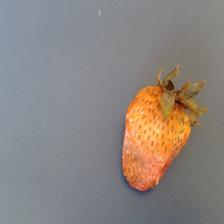

In [14]:
# Specify the path to your image folder
folder_path = "C:/Users/THATHIREDDYESWAREDDY/Documents/Rosi/Smart-Sorting-Transfer-Learning-for-Identifying-Rotten-Fruits-and-Vegetables/output_dataset/test/Strawberry__Rotten" # Replace with the actual path to your image folder

# List all files in the folder
image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.png', '.jpeg'))]

# Select a random image from the list
selected_image = random.choice(image_files)

# Display the randomly selected image
image_path = os.path.join(folder_path, selected_image)
display(Image(filename=image_path))

In [15]:
trainpath = "output_dataset/train"
testpath = "output_dataset/test"

train_datagen = ImageDataGenerator(rescale = 1./255,zoom_range = 0.2,shear_range = 0.2)
test_datagen = ImageDataGenerator(rescale = 1./255)

train = train_datagen.flow_from_directory(trainpath,target_size = (224,224),batch_size = 20)
test = test_datagen.flow_from_directory(testpath,target_size = (224,224),batch_size = 20)

Found 3355 images belonging to 28 classes.
Found 1120 images belonging to 28 classes.


In [16]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model


In [17]:
vgg = VGG16(include_top = False,input_shape = (224,224,3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 280s 5us/step


In [18]:
for layer in vgg.layers:
    print(layer)

<InputLayer name=input_layer, built=True>
<Conv2D name=block1_conv1, built=True>
<Conv2D name=block1_conv2, built=True>
<MaxPooling2D name=block1_pool, built=True>
<Conv2D name=block2_conv1, built=True>
<Conv2D name=block2_conv2, built=True>
<MaxPooling2D name=block2_pool, built=True>
<Conv2D name=block3_conv1, built=True>
<Conv2D name=block3_conv2, built=True>
<Conv2D name=block3_conv3, built=True>
<MaxPooling2D name=block3_pool, built=True>
<Conv2D name=block4_conv1, built=True>
<Conv2D name=block4_conv2, built=True>
<Conv2D name=block4_conv3, built=True>
<MaxPooling2D name=block4_pool, built=True>
<Conv2D name=block5_conv1, built=True>
<Conv2D name=block5_conv2, built=True>
<Conv2D name=block5_conv3, built=True>
<MaxPooling2D name=block5_pool, built=True>


In [19]:
len(vgg.layers)

19

In [20]:
for layer in vgg.layers:
    layer.trainable = False

In [21]:
x = Flatten()(vgg.output)

In [22]:
output = Dense(28, activation = 'softmax')(x)

In [23]:
vgg16 = Model(vgg.input,output)

In [24]:
vgg16.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 28)             │       702,492 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,417,180 (58.81 MB)

 Trainable params: 702,492 (2.68 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [26]:
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam

opt = Adam(learning_rate=0.0001)


# Assuming you have defined your VGG16 model as vgg16

# Define Early Stopping callback
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

# Compile the model (you may have already done this)
vgg16.compile(optimizer = "Adam", loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with early stopping callback
history = vgg16.fit(train,validation_data=test,
                          steps_per_epoch=20,
                          epochs=15,
                          callbacks=[early_stopping])



c:\Users\THATHIREDDYESWAREDDY\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 150s 8s/step - accuracy: 0.1619 - loss: 4.1862 - val_accuracy: 0.4589 - val_loss: 2.0635
Epoch 2/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 142s 7s/step - accuracy: 0.5050 - loss: 1.7391 - val_accuracy: 0.6473 - val_loss: 1.3498
Epoch 3/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 146s 8s/step - accuracy: 0.7046 - loss: 1.1164 - val_accuracy: 0.6554 - val_loss: 1.2942
Epoch 4/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 164s 9s/step - accuracy: 0.6649 - loss: 1.2724 - val_accuracy: 0.7071 - val_loss: 1.2035
Epoch 5/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 139s 7s/step - accuracy: 0.7495 - loss: 0.8621 - val_accuracy: 0.7437 - val_loss: 0.8635
Epoch 6/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 140s 7s/step - accuracy: 0.7899 - loss: 0.8304 - val_accuracy: 0.7777 - val_loss: 0.7756
Epoch 7/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 141s 7s/step - accuracy: 0.8389 - loss: 0.5112 - val_accuracy: 0.7937 - val_loss: 0.7176
Epoch 8/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 153s 8s/step - accuracy: 0.8006 - loss: 0.7259 - val_accuracy: 0.8062 - v

c:\Users\THATHIREDDYESWAREDDY\anaconda3\Lib\site-packages\keras\src\trainers\epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


20/20 ━━━━━━━━━━━━━━━━━━━━ 115s 6s/step - accuracy: 0.8628 - loss: 0.5293 - val_accuracy: 0.8232 - val_loss: 0.6170
Epoch 10/15
 6/20 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - accuracy: 0.8640 - loss: 0.4088

c:\Users\THATHIREDDYESWAREDDY\anaconda3\Lib\site-packages\PIL\Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


20/20 ━━━━━━━━━━━━━━━━━━━━ 140s 7s/step - accuracy: 0.8517 - loss: 0.4593 - val_accuracy: 0.8071 - val_loss: 0.6937
Epoch 11/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 138s 7s/step - accuracy: 0.8721 - loss: 0.3899 - val_accuracy: 0.8286 - val_loss: 0.5919
Epoch 12/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 137s 7s/step - accuracy: 0.8563 - loss: 0.4704 - val_accuracy: 0.7946 - val_loss: 0.7233
Epoch 13/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 139s 7s/step - accuracy: 0.9047 - loss: 0.3218 - val_accuracy: 0.8384 - val_loss: 0.5623
Epoch 14/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 138s 7s/step - accuracy: 0.8857 - loss: 0.3420 - val_accuracy: 0.8045 - val_loss: 0.7934
Epoch 15/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 138s 7s/step - accuracy: 0.9047 - loss: 0.3722 - val_accuracy: 0.8080 - val_loss: 0.6981


In [28]:
vgg16.save('healthy_vs_rotten.h5')

In [34]:
labels = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27]

# Testing class - 1

In [35]:
img_path = "C:/Users\THATHIREDDYESWAREDDY/Documents/Rosi/Smart-Sorting-Transfer-Learning-for-Identifying-Rotten-Fruits-and-Vegetables/output_dataset/train/Bellpepper__Healthy/freshPepper (104).jpg"
import numpy as np
img = load_img(img_path, target_size=(224, 224))
x = img_to_array(img)
x = preprocess_input(x)
preds = vgg16.predict(np.array([x]))
print(preds)
print(labels[np.argmax(preds)])

<>:1: SyntaxWarning: invalid escape sequence '\T'
<>:1: SyntaxWarning: invalid escape sequence '\T'
C:\Users\THATHIREDDYESWAREDDY\AppData\Local\Temp\ipykernel_12960\1739803786.py:1: SyntaxWarning: invalid escape sequence '\T'
  img_path = "C:/Users\THATHIREDDYESWAREDDY/Documents/Rosi/Smart-Sorting-Transfer-Learning-for-Identifying-Rotten-Fruits-and-Vegetables/output_dataset/train/Bellpepper__Healthy/freshPepper (104).jpg"


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step
[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]]
4


# Testing class-2

In [36]:
img_path = "C:/Users/THATHIREDDYESWAREDDY/Documents/Rosi/Smart-Sorting-Transfer-Learning-for-Identifying-Rotten-Fruits-and-Vegetables/output_dataset/train/Mango__Rotten/153.jpg"
import numpy as np
img = load_img(img_path, target_size=(224, 224))
x = img_to_array(img)
x = preprocess_input(x)
preds = vgg16.predict(np.array([x]))
print(preds)
print(labels[np.argmax(preds)])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 500ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]]
17


# Testing class-3

In [38]:
img_path = "C:/Users/THATHIREDDYESWAREDDY/Documents/Rosi/Smart-Sorting-Transfer-Learning-for-Identifying-Rotten-Fruits-and-Vegetables/output_dataset/train/Orange__Healthy/freshOrange (174).png"

import numpy as np
img = load_img(img_path, target_size=(224, 224))
x = img_to_array(img)
x = preprocess_input(x)
preds = vgg16.predict(np.array([x]))
print(preds)
print(labels[np.argmax(preds)])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 1. 0.]]
26
